<a href="https://colab.research.google.com/github/MSSAMAJA/Datascience-python-basics/blob/main/Datascience_basic_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
data = {
    'ab':[1,2,3,4,5],
    'cd':[6,7,8,9,10],
    'ef':[1,2,3,4,5]
}
df=pd.DataFrame(data)
print(df)

   ab  cd  ef
0   1   6   1
1   2   7   2
2   3   8   3
3   4   9   4
4   5  10   5


In [59]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'Salary': [70000, 80000, 90000, 100000]
}

df = pd.DataFrame(data)
print(df)

      Name  Age  Salary
0    Alice   25   70000
1      Bob   30   80000
2  Charlie   35   90000
3    David   40  100000


In [60]:
df[1:3]

,Name,Age,Salary
1,Bob,30,80000
2,Charlie,35,90000


In [61]:
#slicing
df.loc[1:2,['Name','Age']]

,Name,Age
1,Bob,30
2,Charlie,35


In [62]:
df[2:3]

,Name,Age,Salary
2,Charlie,35,90000


In [63]:
df.groupby('Age')['Salary'].mean()

,Salary
Age,
25,70000.0
30,80000.0
35,90000.0
40,100000.0


In [64]:
#pivottables
pt=pd.pivot_table(df,values='Salary',index='Age',aggfunc='mean')
print(pt)

       Salary
Age          
25    70000.0
30    80000.0
35    90000.0
40   100000.0


In [65]:
average_salary=df['Salary'].mean()
total_salary=df['Salary'].sum
total_head=df['Name'].count()
print('total_salary',total_salary)
print('average_salary',average_salary)
print('total_head',total_head)

total_salary <bound method Series.sum of 0     70000
1     80000
2     90000
3    100000
Name: Salary, dtype: int64>
average_salary 85000.0
total_head 4


In [66]:
data2 = {
    'Name': ['Alice', 'Charlie', 'Eve'],
    'Bonus': [5000, 7000, 6000]
}

df2 = pd.DataFrame(data2)

In [67]:
#merge and joins
inner=pd.merge(df,df2,on='Name')
print('inner merge',inner)

inner merge       Name  Age  Salary  Bonus
0    Alice   25   70000   5000
1  Charlie   35   90000   7000


In [68]:
#left and right
left=pd.merge(df,df2,on='Name',how='left')
print('left merge',left)

left merge       Name  Age  Salary   Bonus
0    Alice   25   70000  5000.0
1      Bob   30   80000     NaN
2  Charlie   35   90000  7000.0
3    David   40  100000     NaN


In [69]:
# Concatenating row-wise
df_concat = pd.concat([df, df2], ignore_index=True, sort=False)
print(df_concat)
print('.....')
# Concatenating column-wise
df_concat_col = pd.concat([df, df2], axis=1)
print(df_concat_col)


      Name   Age    Salary   Bonus
0    Alice  25.0   70000.0     NaN
1      Bob  30.0   80000.0     NaN
2  Charlie  35.0   90000.0     NaN
3    David  40.0  100000.0     NaN
4    Alice   NaN       NaN  5000.0
5  Charlie   NaN       NaN  7000.0
6      Eve   NaN       NaN  6000.0
.....
      Name  Age  Salary     Name   Bonus
0    Alice   25   70000    Alice  5000.0
1      Bob   30   80000  Charlie  7000.0
2  Charlie   35   90000      Eve  6000.0
3    David   40  100000      NaN     NaN


In [70]:
#practice

In [71]:
import pandas as pd
import numpy as np

# Sample DataFrame creation
data = {
    'EmployeeID': [101, 102, 103, 104, 105, 106],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Department': ['HR', 'IT', 'Finance', 'HR', 'IT', 'Finance'],
    'Age': [25, 30, 35, np.nan, 40, 29],
    'Salary': [50000, 60000, 70000, np.nan, 90000, 65000]
}

# Second DataFrame for merging
bonus_data = {
    'EmployeeID': [101, 102, 103, 106],
    'Bonus': [5000, 7000, 6000, 8000]
}

In [72]:
df1=pd.DataFrame(data)
df2=pd.DataFrame(bonus_data)

In [73]:
print(df1)

   EmployeeID     Name Department   Age   Salary
0         101    Alice         HR  25.0  50000.0
1         102      Bob         IT  30.0  60000.0
2         103  Charlie    Finance  35.0  70000.0
3         104    David         HR   NaN      NaN
4         105      Eve         IT  40.0  90000.0
5         106    Frank    Finance  29.0  65000.0


In [74]:
print(df2)

   EmployeeID  Bonus
0         101   5000
1         102   7000
2         103   6000
3         106   8000


In [75]:
#Slicing and Indexing:
#print(df.loc[df['Department'] == 'IT', ['Name', 'Age']])
print(df1.loc[df1['Department'] == 'IT', ['Name', 'Age']])

#Slice the DataFrame to get the rows from index 2 to 5 and the columns 'Name' and 'Salary'.
print(df1.loc[2:5,['Name','Salary']])

  Name   Age
1  Bob  30.0
4  Eve  40.0
      Name   Salary
2  Charlie  70000.0
3    David      NaN
4      Eve  90000.0
5    Frank  65000.0


In [76]:
#Group the DataFrame by 'Department' and calculate the mean age and salary for each department.
print(df1.groupby('Department')['Salary'].mean())
#count the number of employees in each department.
df1['Name'].count()

Department
Finance    67500.0
HR         50000.0
IT         75000.0
Name: Salary, dtype: float64


6

In [77]:
#Pivot Table:

#Create a pivot table that shows the total salary per department, and the average age of employees within each department.

pt=pd.pivot_table(df1,values=['Salary','Age'],index='Department',aggfunc={'Salary':'sum','Age':'mean'})
print(pt)

             Age    Salary
Department                
Finance     32.0  135000.0
HR          25.0   50000.0
IT          35.0  150000.0


In [78]:
#Aggregations:

#Calculate the sum, mean, and count of 'Salary' for the entire DataFrame.
print(df1['Salary'].sum())
print(df1['Salary'].mean())
print(df1['Salary'].count())

335000.0
67000.0
5


In [79]:
#Merging DataFrames:

#Merge the two DataFrames on 'EmployeeID', keeping all employees from the original DataFrame, regardless of whether they have a bonus or not (left join).

merged=pd.merge(df1,df2,on='EmployeeID',how='left')
print('left join',merged)

left join    EmployeeID     Name Department   Age   Salary   Bonus
0         101    Alice         HR  25.0  50000.0  5000.0
1         102      Bob         IT  30.0  60000.0  7000.0
2         103  Charlie    Finance  35.0  70000.0  6000.0
3         104    David         HR   NaN      NaN     NaN
4         105      Eve         IT  40.0  90000.0     NaN
5         106    Frank    Finance  29.0  65000.0  8000.0


In [80]:
#concateneate
#rowwise
print(pd.concat([df1,df2],ignore_index=True,sort=False))
print('...........')
#columnwise
print(pd.concat([df1,df2],axis=1))

   EmployeeID     Name Department   Age   Salary   Bonus
0         101    Alice         HR  25.0  50000.0     NaN
1         102      Bob         IT  30.0  60000.0     NaN
2         103  Charlie    Finance  35.0  70000.0     NaN
3         104    David         HR   NaN      NaN     NaN
4         105      Eve         IT  40.0  90000.0     NaN
5         106    Frank    Finance  29.0  65000.0     NaN
6         101      NaN        NaN   NaN      NaN  5000.0
7         102      NaN        NaN   NaN      NaN  7000.0
8         103      NaN        NaN   NaN      NaN  6000.0
9         106      NaN        NaN   NaN      NaN  8000.0
...........
   EmployeeID     Name Department   Age   Salary  EmployeeID   Bonus
0         101    Alice         HR  25.0  50000.0       101.0  5000.0
1         102      Bob         IT  30.0  60000.0       102.0  7000.0
2         103  Charlie    Finance  35.0  70000.0       103.0  6000.0
3         104    David         HR   NaN      NaN       106.0  8000.0
4         105   

In [81]:
#Detecting Missing Values:

#Check if there are any missing values in the 'Salary' column of the DataFrame.
#Handling Missing Data:
print(df1['Salary'].isna())

#Fill missing values in the 'Salary' column with the average salary.
#Drop all rows where 'Salary' is missing.
#Replacing Values:
print(df1['Salary'].fillna(df1['Salary'].mean()))

#Replace the missing values in the 'Age' column with the median age of the employees.
print(df['Age'].fillna(df['Age'].median()))


0    False
1    False
2    False
3     True
4    False
5    False
Name: Salary, dtype: bool
0    50000.0
1    60000.0
2    70000.0
3    67000.0
4    90000.0
5    65000.0
Name: Salary, dtype: float64
0    25
1    30
2    35
3    40
Name: Age, dtype: int64


In [82]:
#DATAVISUALIZATION

categories = ['A', 'B', 'C']
values = [5, 7, 3]

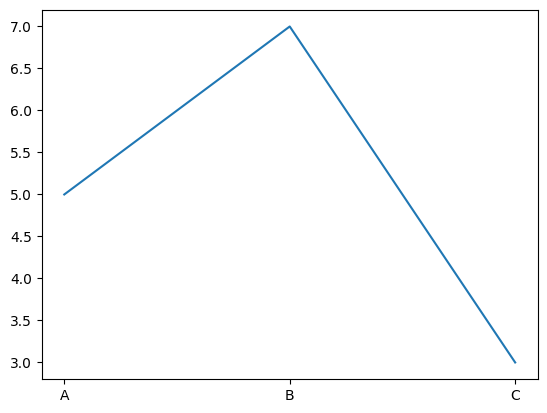

In [86]:
import matplotlib.pyplot as plt

plt.plot(categories,values)


<BarContainer object of 3 artists>

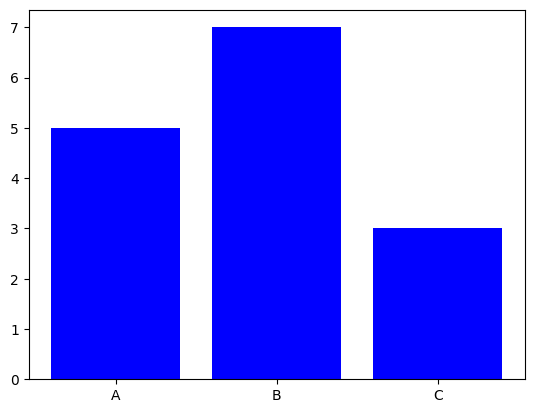

In [87]:
plt.bar(categories,values,color='blue')


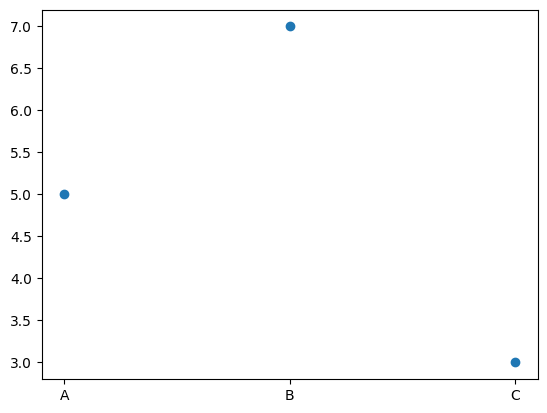

In [88]:
plt.scatter(categories,values)